<a href="https://colab.research.google.com/github/Danielfasuba/ml-learning-models/blob/main/Housing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the data


In [ ]:
# Importing modules and tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


In [ ]:
# Downloading dataset
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
# Loading dataset
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Discovering the data

In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#Checking sub-categories of categorical attribute
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# Showing summary of numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


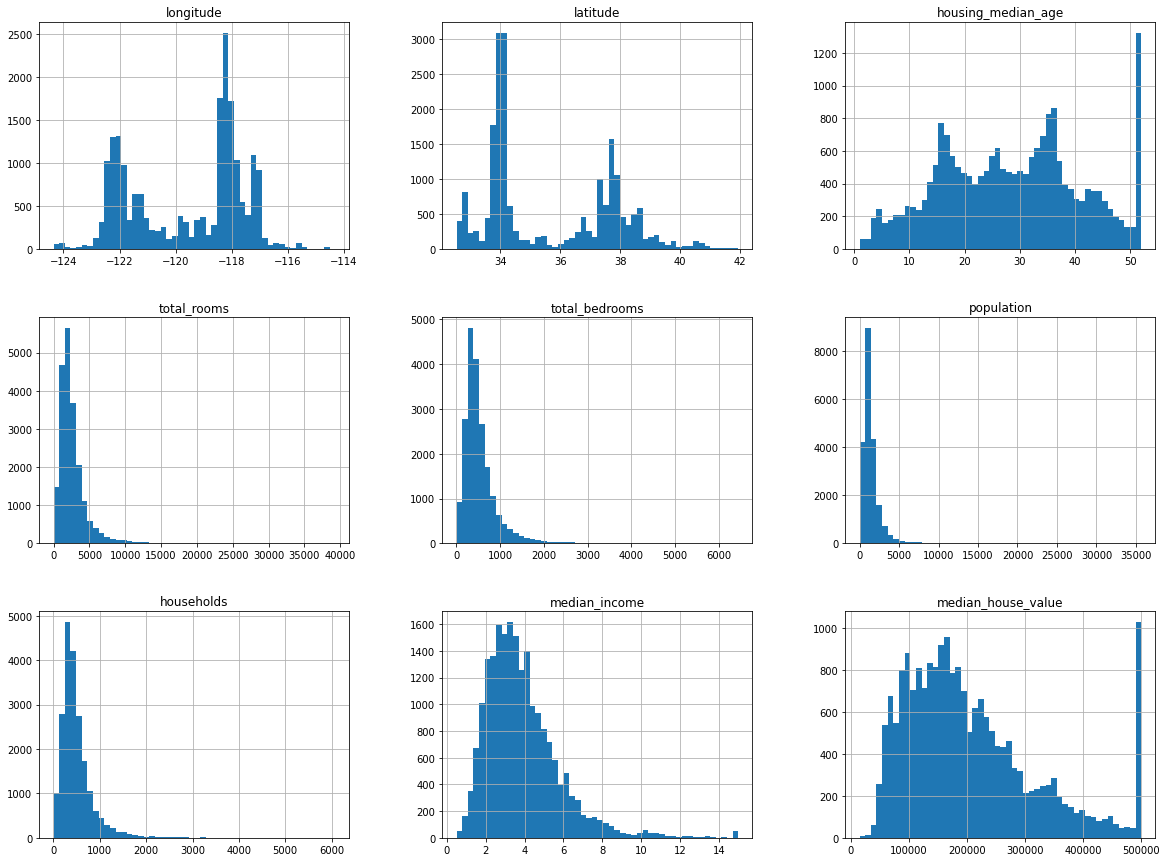

In [ ]:
# plotting histogram of housing data features
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))
plt.show()

Create Test set


In [ ]:
# Using sci-kit learn's train_test_split to split data into training and test set
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=5)

In [ ]:
# Stratified Sampling
#creating an income category to categorize various stratum of the income data
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

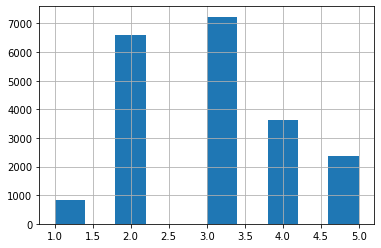

In [ ]:
housing["income_cat"].hist()

In [ ]:
# Creating StratifiedShuffleSplit object "split"
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)

In [ ]:
# creating the stratified train-test sets based on "income_cat" strata
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
# To look at the income category proportions in the test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set) 

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0,<1H OCEAN,4
13036,-121.17,38.68,37.0,1252.0,267.0,686.0,256.0,3.0000,121900.0,INLAND,2
6055,-117.86,33.99,10.0,17820.0,2812.0,8686.0,2666.0,6.3875,310700.0,<1H OCEAN,5
6754,-118.10,34.10,52.0,1788.0,313.0,792.0,294.0,3.7500,280000.0,<1H OCEAN,3
867,-122.07,37.57,8.0,8647.0,1407.0,5019.0,1379.0,6.5615,318300.0,NEAR BAY,5


In [ ]:
# Remove the income_cat attribute and get the data back to its original state
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True) 

Discover and Visualize data


In [ ]:
# Create copy of training set; so manipulations do not harm the training set 
housing = strat_train_set.copy()

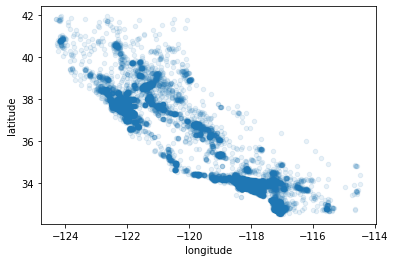

In [ ]:
# Visualizing geographical data
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

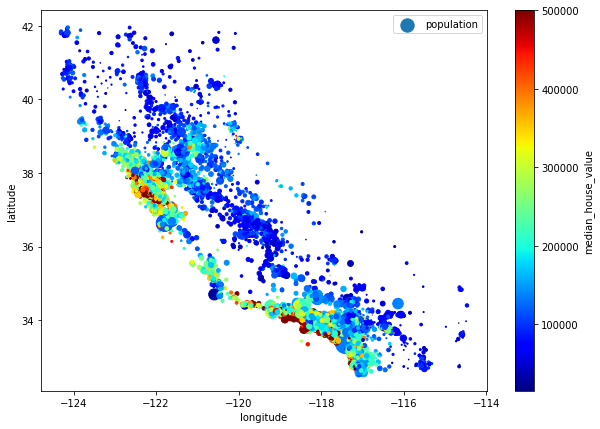

In [ ]:
# exploring through tweaking visualization parameters
housing.plot(kind="scatter", x="longitude", y="latitude", s=housing["population"] / 100,
             label="population", figsize=(10, 7), c="median_house_value",
             cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

In [ ]:
# Looking for correlations
corr_matrix = housing.corr()

In [ ]:
# checking how other atttributes correlate with meidan house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686568
total_rooms           0.135369
housing_median_age    0.104159
households            0.066257
total_bedrooms        0.051031
population           -0.023733
longitude            -0.047957
latitude             -0.142464
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6d7c55390>,
      dtype=object)

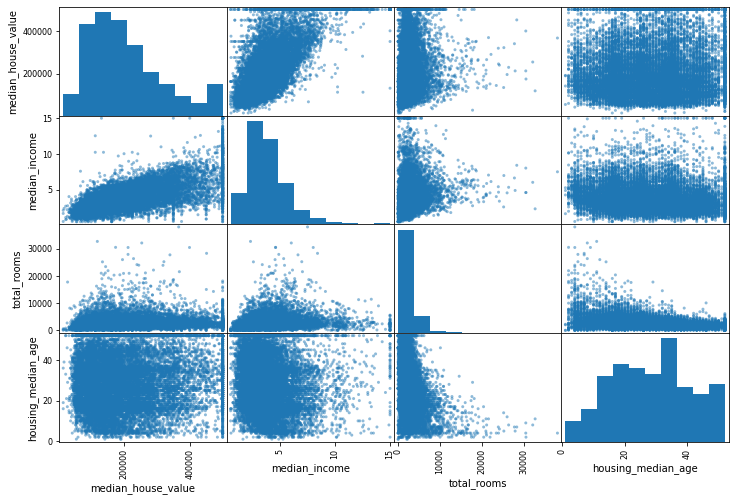

In [ ]:
# Using pandas scatter_matrix to view correlation
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

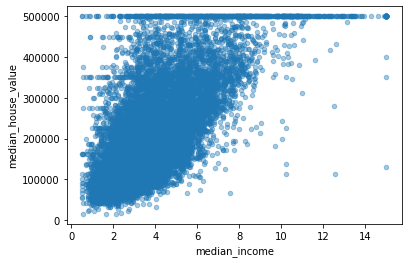

In [ ]:
# Scatter plot of median_house_values to median_income
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4)


Experiment attribute combinations


In [ ]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]


In [ ]:
# Checking correlations, including the newly combined attributes 
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.686568
rooms_per_household         0.143970
total_rooms                 0.135369
housing_median_age          0.104159
households                  0.066257
total_bedrooms              0.051031
population_per_household   -0.021512
population                 -0.023733
longitude                  -0.047957
latitude                   -0.142464
bedrooms_per_room          -0.255372
Name: median_house_value, dtype: float64

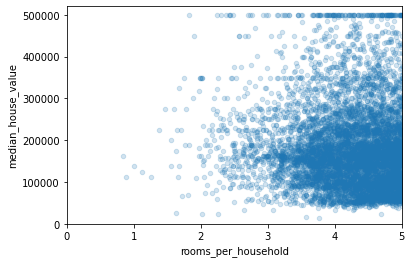

In [ ]:
# Visualizing scatter plot of rooms per h/hold attribute and median house value
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

Prepare data for ML algorithms

In [ ]:
# Separating the predictors from labels; not neccessarily applying same transformations to them both
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

 Data Cleaning

In [ ]:
# To take care of missing values, I could use either of the following methods; drop(), dropna(), fillna()
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
imputer.strategy

'median'

In [ ]:
# To fill median for missing values, we need to create a copy of the data w/o any categorical attributes since median is only computed on numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2129.    ,  435.    , 1166.    ,
        410.    ,    3.5334])

In [ ]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2129.    ,  435.    , 1166.    ,
        410.    ,    3.5334])

In [ ]:
# Using the trained imputer to transform all missing values by the learned median
# The transformed method return a numpy array of transformed features
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

Handling Text and Categorical Attributes

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
11397,<1H OCEAN
13036,INLAND
6055,<1H OCEAN
6754,<1H OCEAN
867,NEAR BAY


In [ ]:
# Converting the caegorical attributes from text to numbers
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [ ]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# Converting categorical values into one hot vectors
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder() 

In [ ]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [ ]:
# OneHotEncoder returns a sparse matrix, so we can convert to an array using toarray() method
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# Creating a custom transformer to add combined attributes
from sklearn.base import BaseEstimator, TransformerMixin # Importing base classes to inherit sklearn's functionalities

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values) # values is a pandas dataframe method which returns anumpy representation of the dataframe

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,6.602649,3.172185
13036,-121.17,38.68,37.0,1252.0,267.0,686.0,256.0,3.0,INLAND,4.890625,2.679688
6055,-117.86,33.99,10.0,17820.0,2812.0,8686.0,2666.0,6.3875,<1H OCEAN,6.684171,3.258065
6754,-118.1,34.1,52.0,1788.0,313.0,792.0,294.0,3.75,<1H OCEAN,6.081633,2.693878
867,-122.07,37.57,8.0,8647.0,1407.0,5019.0,1379.0,6.5615,NEAR BAY,6.270486,3.639594


Trandformation Pipelines


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # For feature scaling (standardization)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
# Using a single transformer to handle both categorical and numerical columns
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN
13036,-121.17,38.68,37.0,1252.0,267.0,686.0,256.0,3.0000,INLAND
6055,-117.86,33.99,10.0,17820.0,2812.0,8686.0,2666.0,6.3875,<1H OCEAN
6754,-118.10,34.10,52.0,1788.0,313.0,792.0,294.0,3.7500,<1H OCEAN
867,-122.07,37.57,8.0,8647.0,1407.0,5019.0,1379.0,6.5615,NEAR BAY


In [ ]:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

Select & Train a Model


In [ ]:
# Training a LinearRegression Model
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
# Trying the linear regression model on a few instances
some_data = housing.iloc[: 5]
some_labels = housing_labels.iloc[: 5]

In [ ]:
some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("predictions :", lin_reg.predict(some_data_prepared))
print("label :", list(some_labels))

predictions : [270543.65171472 115273.36581187 281305.16841152 232378.10888898
 282239.78881417]
label : [273400.0, 121900.0, 310700.0, 280000.0, 318300.0]


In [ ]:
# Measuring the model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

In [ ]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse # Clearly not a great score, probably a case of model underfitting the training data 

68651.79556680842

In [ ]:
# Trying out a more powerful model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

In [ ]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
# model evaluation on training set
housing_tree_pred = tree_reg.predict(housing_prepared)

In [ ]:
tree_mse = mean_squared_error(housing_labels, housing_tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # Hmm, much likely that the model has badly overfit the data

0.0

In [ ]:
# Better evaluation using scikit-learn's K-fold cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
scores

array([-5.60075272e+09, -4.86879647e+09, -4.80705296e+09, -5.10280667e+09,
       -5.10761649e+09, -4.68571622e+09, -4.89139745e+09, -5.52066994e+09,
       -5.31081225e+09, -5.23605926e+09])

In [ ]:
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
# Looking at the results
def display_scores(scores):
  print("scores: ", scores)
  print("mean: ", scores.mean())
  print("standard deviation: ", scores.std()) 

display_scores(tree_rmse_scores)

scores:  [74838.17688057 69776.76165628 69332.9139875  71433.93222904
 71467.59051431 68452.29157044 69938.52621044 74301.21085981
 72875.31986447 72360.61952602]
mean:  71477.73432988787
standard deviation:  2025.2252919537489


In [ ]:
# cross validation for linear regression and compare scores
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [ ]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores:  [68515.9574538  72696.38198026 68016.6185853  70596.44989256
 68720.09291149 66407.17575832 66561.30358581 68776.14214279
 67478.23814869 72015.82119211]
mean:  68978.41816511503
standard deviation:  2040.0476735338766


In [ ]:
# trying out Random forest regressor, since decision trees is overfitting badly
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [ ]:
housing_forest_pred = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, housing_forest_pred)
forest_rmse = np.sqrt(forest_mse)

In [ ]:
forest_rmse

18543.625139246367

In [ ]:
# Using K-fold cross validation
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

In [ ]:
display_scores(forest_rmse_scores) 
# Noting score difference between training set and cross validation sets

scores:  [51020.70166148 50012.91472028 48656.5256651  50276.83384189
 50562.50984868 47351.96097065 46962.90901939 51734.40514898
 49641.11185813 52116.03273202]
mean:  49833.59054666025
standard deviation:  1637.4872204744975


Fine Tuning Model by setting hyperparameters

In [ ]:
# Using GridSearchCV to search for best combination of hyperparameter values of the Random forest regressor model
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [ ]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Getting the best combibination of parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [ ]:
# The evaluation scores are also available
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

63410.792333231286 {'max_features': 2, 'n_estimators': 3}
55023.39545112171 {'max_features': 2, 'n_estimators': 10}
52344.543913164016 {'max_features': 2, 'n_estimators': 30}
59818.55004405618 {'max_features': 4, 'n_estimators': 3}
52250.21969632548 {'max_features': 4, 'n_estimators': 10}
50075.881196132534 {'max_features': 4, 'n_estimators': 30}
58877.02280739615 {'max_features': 6, 'n_estimators': 3}
52194.96970639785 {'max_features': 6, 'n_estimators': 10}
49701.95631208992 {'max_features': 6, 'n_estimators': 30}
58105.56119221983 {'max_features': 8, 'n_estimators': 3}
51749.44123348257 {'max_features': 8, 'n_estimators': 10}
49941.343773657216 {'max_features': 8, 'n_estimators': 30}
62701.71851513263 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53653.5969487728 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59748.480653403174 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52781.75178952284 {'bootstrap': False, 'max_features': 3, 'n_estimators'

Analyze the best models and their errors

In [ ]:
# Looking at relative importance of each attribute and their errors
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.93516548e-02, 7.40342123e-02, 3.95118670e-02, 1.64084663e-02,
       1.56688249e-02, 1.63362664e-02, 1.53277348e-02, 2.87276734e-01,
       7.66953372e-02, 1.08491911e-01, 8.15185716e-02, 8.60750717e-03,
       1.73391854e-01, 1.55751412e-04, 2.82060190e-03, 4.40270459e-03])

Evaluate your system on test set

In [ ]:
# Preparing the finetuned model for evaluation
final_model = grid_search.best_estimator_

In [ ]:
# Preparing test data
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [ ]:
# Transforming test data
x_test_prepared = full_pipeline.transform(x_test)

In [ ]:
final_predictions = final_model.predict(x_test_prepared)

In [ ]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [ ]:
final_rmse

49039.17317441923

In [ ]:
# computing 95% confidence interval for the generalization error

from scipy import stats 
confidence = 0.95
squared_errors = (final_predictions - y_test)**2

In [ ]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46899.05894699, 51089.71795918])

Further model selection and Training


In [ ]:
# Trying a support vector machine regressor with various hyperparameters
from sklearn.svm import SVR

params_grid = [
               {'kernel': ['linear'], 'C': [1, 5, 10, 15]},
               {'kernel': ['rbf'], 'C': [1, 5, 10], 'gamma':['scale', 'auto']},
]

svm_reg = SVR()

In [ ]:
grid_Search = GridSearchCV(svm_reg, params_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_Search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 5, 10, 15], 'kernel': ['linear']},
                         {'C': [1, 5, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_Search.best_estimator_

SVR(C=15, kernel='linear')

In [ ]:
# Checking results of various hyperparameter combinations of the SVR model
cv_res = grid_Search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
  print(np.sqrt(-mean_score), params)

112387.66188955701 {'C': 1, 'kernel': 'linear'}
95184.5152565906 {'C': 5, 'kernel': 'linear'}
84614.09078323425 {'C': 10, 'kernel': 'linear'}
80544.46346173568 {'C': 15, 'kernel': 'linear'}
118455.75312734982 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
118458.03254700874 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
117290.04264796915 {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
117312.31853383537 {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}
115896.46894361945 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
115929.5583275321 {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# Trying out RandomizedSearchCv to find hyperparameters
from scipy.stats import expon, reciprocal

from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'kernel': ['linear', 'rbf'], 
                       'C': reciprocal(20, 200000), 'gamma': expon(scale=1.0), } 


In [ ]:
random_search = RandomizedSearchCV(svm_reg, param_distributions, n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                   return_train_score=True, verbose=2)

random_search.fit(housing_prepared, housing_labels)

In [ ]:
# Checking parameters of best estimator
random_search.best_estimator_

In [ ]:
# Checking RMSE results of the estimators
cv_scores = random_search.cv_results_
for mean_score, params in zip(cv_scores["mean_test_score"], cv_scores["params"]):
  print(np.sqrt(-mean_score), params)

Inference: Random Forest Regressor performs best compared with Linear regression, decision trees, and support vector regressor